In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


ratings_df = pd.read_csv("ratings.csv")

ratings_df = ratings_df.drop("timestamp", axis= 1)
ratings_df = pd.DataFrame(ratings_df)
print(ratings_df)
train,test = train_test_split(ratings_df, test_size=0.2, random_state=0)


        userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

[100836 rows x 3 columns]


Max User ID in Training Data: 610
Unique users:  610  Unique movies:  8975
Epoch 1/7
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.8378 - val_loss: 1.1052
Epoch 2/7
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0694 - val_loss: 1.1078
Epoch 3/7
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0246 - val_loss: 1.1061
Epoch 4/7
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0059 - val_loss: 1.1071
Epoch 5/7
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9773 - val_loss: 1.0716
Epoch 6/7
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9657 - val_loss: 1.0722
Epoch 7/7
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9733 - val_loss: 1.0832


Text(0, 0.5, 'Training Error')

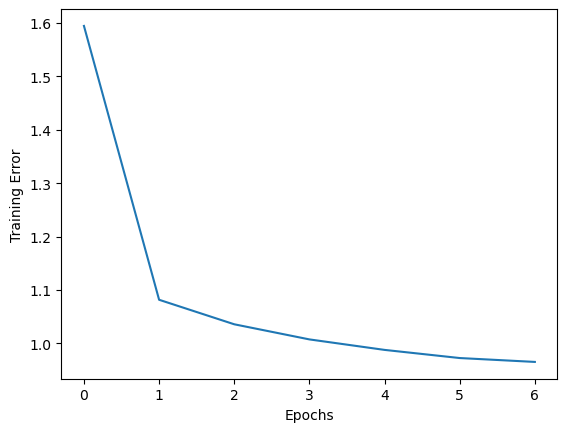

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import load_model
n_users = len(train.userId.unique())
n_movies = len(train.movieId.unique())
#n_factors are the embedding layers 
n_factors=30

max_user_id = train.userId.max()

print("Max User ID in Training Data:", max_user_id)

print("Unique users: ",n_users, " Unique movies: ", n_movies)
#ININT our nn
movies_input = Input(shape=[1], name="movies-Input")
movies_embedding = Embedding(output_dim=n_factors, input_dim=n_movies, name='movie_embedding')(movies_input)
movies_vec = Flatten(name="Flatten-movies")(movies_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(output_dim=n_factors, input_dim=n_users, name='user_embedding')(user_input)
user_vec = Flatten(name='flatten_users')(user_embedding)

y = Dot(axes=1, name='dot_product')([user_vec, movies_vec])
model = Model(inputs=[user_input, movies_input], outputs=y)
#he model is compiled using the Adam optimizer with a learning rate of 0.01
#and mean squared error as the loss function
model.compile(optimizer=Adam(0.01), loss='mean_squared_error')

#TRAIN
history = model.fit([train.movieId,train.userId], train.rating, epochs=7, validation_split=0.2)
model.save('regression_model.h5')
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")


In [9]:
#a simple function that returns true if the movie is in the dataset or false if there isn't

def is_movie_id_in_dataset(id, dataset):
    """
    Check if a movie ID is present in the dataset.
    Returns,True if the user ID is in the dataset, False otherwise.
    """
    return id in dataset['movieId'].unique()

movies_data = np.array(list(set(ratings_df.movieId)))
user = np.array([295 for i in range(len(movies_data))])

predictions = model.predict([user, movies_data])
predictions = np.array([a[0] for a in predictions])
recommended_movies_ids = (-predictions).argsort()[:10]
print(recommended_movies_ids)
movie_d = pd.read_csv('movies.csv')
movie_d.head()
#some times we get Movies Id that are not in the database, because the data base has empty cells
five_moves_fill = 0
movies_R = []

for j in range(7):
    if(is_movie_id_in_dataset(recommended_movies_ids[j], movie_d)):
        movies_R.append(recommended_movies_ids[j])
        five_moves_fill += 1
        if(five_moves_fill == 5):
            break

movie_d[movie_d['movieId'].isin(movies_R)]    



304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
[143 103 542 476 351 167 223 380 440 253]


,movieId,title,genres
91,103,Unforgettable (1996),Mystery|Sci-Fi|Thriller
190,223,Clerks (1994),Comedy
309,351,"Corrina, Corrina (1994)",Comedy|Drama|Romance
414,476,"Inkwell, The (1994)",Comedy|Drama
475,542,Son in Law (1993),Comedy|Drama|Romance
